<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot


In [19]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/diabetes_dataset.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome

In [21]:
# Import AdaBoostClassifier etc.
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [31]:
# Split the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [32]:
train_acc = []
test_acc = []
train_err = []
test_err = []
all_acc = []
all_err = []
n_est = []

for i in range(1, 100):
   # Create AdaBoost classifer object with DecisionTreeClassifier(max_depth)
   model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=i, learning_rate=1)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test datasets
   y_test_pred = model.predict(x_test)
   #For full data set
   y_all_pred = model.predict(x)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   train_err.append(1-train_acc[i-1])
   test_err.append(1-test_acc[i-1])
   all_acc.append(metrics.accuracy_score(y, y_all_pred))
   all_err.append(1-all_acc[i-1])
   n_est.append(i)





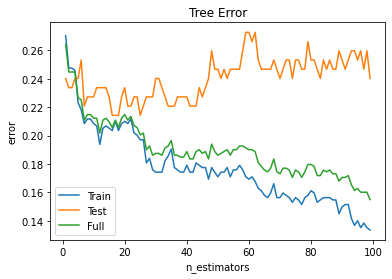

In [33]:
#plot results vs tree depth
pyplot.plot(n_est, train_err, label='Train')
pyplot.plot(n_est, test_err, label='Test')
#pyplot.plot(n_est, test2_acc, label='Test2')
pyplot.plot(n_est, all_err, label='Full')
pyplot.title('Tree Error')
pyplot.ylabel('error')
pyplot.xlabel('n_estimators')
pyplot.legend()
pyplot.show()

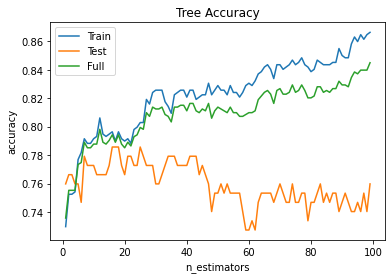

In [34]:
#plot results vs tree depth
pyplot.plot(n_est, train_acc, label='Train')
pyplot.plot(n_est, test_acc, label='Test')
pyplot.plot(n_est, all_acc, label='Full')
pyplot.title('Tree Accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('n_estimators')
pyplot.legend()
pyplot.show()